In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

In [2]:
dataset_path = r'C:\Users\Hp\Downloads\VW_AI\dataset'
train_path = r'C:\Users\Hp\Downloads\VW_AI\dataset\train'
img_size = (150, 150)
batch_size = 32

In [3]:
gender = 'male'  
clothing_type = 'tops'  

In [4]:
import os
class_path = os.path.join(train_path, gender, clothing_type)

In [5]:
if not os.path.exists(class_path):
    print(f"Error: The class directory '{class_path}' does not exist.")
    exit()

In [6]:
image_files = [os.path.join(class_path, file) for file in os.listdir(class_path) if file.endswith('.jpg')]

In [7]:
if not image_files:
    print(f"Error: No '.jpg' files found in the class directory '{class_path}'.")
    exit()

In [8]:
image_path = image_files[0]

In [9]:
img = tf.keras.preprocessing.image.load_img(image_path)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

In [10]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255,
    brightness_range=[0.5, 1.5],
)
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
)

Found 16 files belonging to 2 classes.


In [11]:
augmented_images = datagen.flow(img_array, batch_size=1)

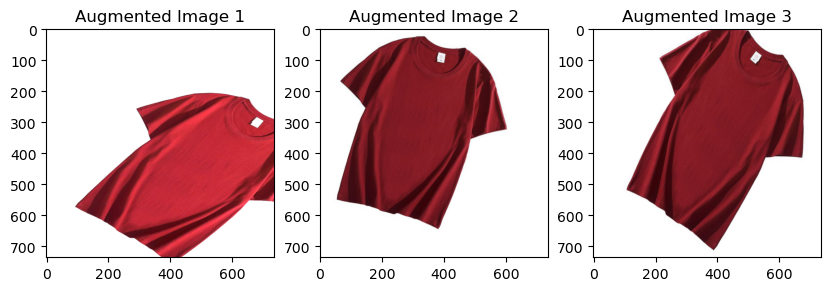

In [12]:
plt.figure(figsize=(10, 4))
for i in range(3):  # Display original and two augmented versions
    augmented_image = augmented_images.next()[0]
    plt.subplot(1, 3, i + 1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(augmented_image))
    plt.title(f'Augmented Image {i + 1}')

plt.show()

In [13]:
target_size = (224, 224)

In [14]:
img_array /= 255.0

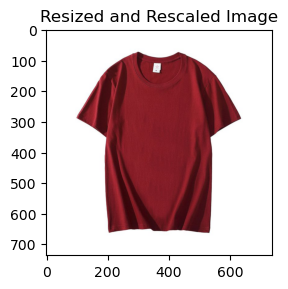

In [15]:
plt.subplot(1, 2, 2)
plt.imshow(tf.keras.preprocessing.image.array_to_img(img_array[0]))
plt.title('Resized and Rescaled Image')

plt.show()

In [16]:
max_pixel_value = tf.reduce_max(img_array)
min_pixel_value = tf.reduce_min(img_array)

print(f"Maximum Pixel Value: {max_pixel_value.numpy()}")
print(f"Minimum Pixel Value: {min_pixel_value.numpy()}")

Maximum Pixel Value: 1.0
Minimum Pixel Value: 0.0


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255,  # Rescale pixel values to [0, 1]
    brightness_range=[0.5, 1.5],  # Random contrast adjustment
)

In [18]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

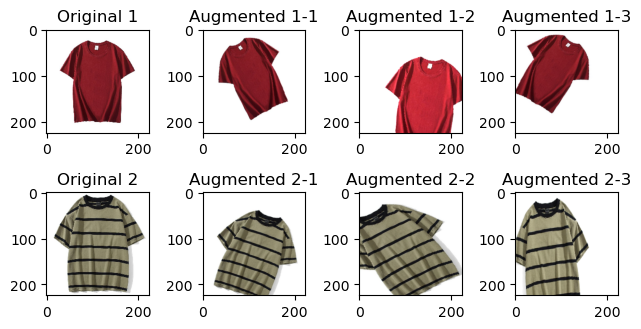

In [19]:
for i, image_path in enumerate(image_files[:3]):  # Display augmentation for the first three images
    # Load and resize the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Generate augmented images
    augmented_images = datagen.flow(img_array, batch_size=1)

    # Display original image
    plt.subplot(3, 4, i*4 + 1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(img_array[0]))
    plt.title(f'Original {i + 1}')

    # Display augmented images
    for j in range(3):  # Display three augmented versions for each original image
        augmented_image = augmented_images.next()[0]
        plt.subplot(3, 4, i*4 + j + 2)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(augmented_image))
        plt.title(f'Augmented {i + 1}-{j + 1}')
plt.tight_layout()
plt.show()

In [32]:
preprocessing_layers = tf.keras.Sequential([
    preprocessing.Rescaling(scale=1./255),
    preprocessing.Rescaling(scale=2),
    preprocessing.Rescaling(scale=1/2),
    preprocessing.Rescaling(scale=2),
])

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
preprocessed_dataset = dataset.map(lambda x, y: (preprocessing_layers(x), y))
for images, labels in preprocessed_dataset.take(1):
    print(images.shape) 

(16, 224, 224, 3)


In [34]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(preprocessed_dataset, epochs=15)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.7304 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 1s 859ms/step - loss: 9.5375 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 1s 863ms/step - loss: 7.3300 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 1s 898ms/step - loss: 2.5462 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 1s 861ms/step - loss: 0.5516 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 1s 871ms/step - loss: 0.5362 - accuracy: 0.6875
Epoch 7/15
1/1 [==============================] - 1s 893ms/step - loss: 0.5746 - accuracy: 0.5625
Epoch 8/15
1/1 [==============================] - 1s 943ms/step - loss: 0.4441 - accuracy: 0.8125
Epoch 9/15
1/1 [==============================] - 1s 904ms/step - loss: 0.3947 - accuracy: 0.8125
Epoch 10/15
1/1 [==============================] - 1s 873ms/step - loss: 0.3534 - accuracy: 0.7500
Epoch 11/15
1/1 [=====

In [36]:
evaluation_result = model.evaluate(preprocessed_dataset)

# Print the accuracy as a percentage
accuracy = evaluation_result[1]  # Assuming accuracy is the second metric
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

1/1 [==============================] - 0s 332ms/step - loss: 0.2543 - accuracy: 0.8125
Accuracy: 81.25%


In [37]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    dataset_path + '\\validation\\',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8 images belonging to 2 classes.


In [38]:
train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'validation')

In [39]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
)

# Create validation dataset
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_path,
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle validation data
)

Found 8 files belonging to 2 classes.
Found 8 files belonging to 2 classes.


In [40]:
epochs = 15
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
)

# Evaluate the model on the validation set
evaluation_result = model.evaluate(val_dataset)

# Print the accuracy as a percentage
accuracy = evaluation_result[1]  # Assuming accuracy is the second metric
accuracy_percentage = accuracy * 100
print(f"Validation Accuracy: {accuracy_percentage:.2f}%")

Epoch 1/15
1/1 [==============================] - 1s 770ms/step - loss: 246.9891 - accuracy: 0.5000 - val_loss: 264.5824 - val_accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 1s 771ms/step - loss: 67.9795 - accuracy: 0.2500 - val_loss: 310.1650 - val_accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 1s 770ms/step - loss: 92.2357 - accuracy: 0.5000 - val_loss: 158.7225 - val_accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 1s 758ms/step - loss: 27.8331 - accuracy: 0.6250 - val_loss: 64.3966 - val_accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 1s 796ms/step - loss: 19.1710 - accuracy: 0.7500 - val_loss: 40.5887 - val_accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 1s 773ms/step - loss: 7.4315 - accuracy: 0.7500 - val_loss: 50.0041 - val_accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 1s 766ms/step - loss: 11.3418 - accuracy: 0.6250 - val_loss: 42.9155 - val_accuracy: 0.5000
Epo